In [1485]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1486]:
!pip install scikit-plot

**Import the Packages**

In [1487]:
import pandas as pd
import numpy as np
from sklearn import tree,svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,auc,recall_score,precision_score
from sklearn.ensemble import RandomForestClassifier
import scikitplot as skplt
%matplotlib inline

#**Read the file**

In [1488]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/Project_Data.csv")

In [1489]:
data

,Timestamp,Do you use Video Streaming Platforms?,What is your Age?,How frequently you watch or stream online platforms?,What do you watch most on Video Streaming Platforms?,On what basis you frequently choose to watch on the Streaming Platforms?,Which of the following Subscription Based Video Streaming Platform do you currently use?,On what basis do you subscribe any of the above Platforms?,How long you are using these Video Streaming Platforms?,"On scale of 5,Can you rate the Netflix? [Original Web Series]","On scale of 5,Can you rate the Netflix? [Movies]","On scale of 5,Can you rate the Netflix? [Documentaries]","On scale of 5,Can you rate the Netflix? [Others]","On scale of 5,Can you rate the Prime? [Original Web Series]","On scale of 5,Can you rate the Prime? [Movies]","On scale of 5,Can you rate the Prime? [Documentaries]","On scale of 5,Can you rate the Prime? [Sports and News]","On scale of 5,Can you rate the Hotstar? [Original Web Series]","On scale of 5,Can you rate the Hotstar? [Movies]","On scale of 5,Can you rate the Hotstar? [Documentaries]","On scale of 5,Can you rate the Hotstar? [Sports and News]",Have you watch or familiar with these original Web Series of Netflix?,Have you watch or familiar with these original Web Series of Prime?,Have you watch or familiar with these original Web Series of Hotstar?,From where did you get the idea of these Web Series?,Choose the features which you think is essential on your streaming platforms.,How was your overall experience of video streaming platform according to Original Series?,suggestions for the improvement of video streaming platforms?
0,5/8/2021 13:40:40,Yes,18-30,Daily,All of the above,All of the above,Prime,Original Web Series,More than 2 Year,4,4,4,3,5,5,5,5,3,2,2,2,"Sacred Games, 13 Reason Why, Money Heist",All of the above,None,All of the above,Search Option,Good,Remove Ads/Limit Ads duration
1,5/8/2021 13:44:41,Yes,18-30,Once or twice in a week,Original Web Series,Story,Netflix,Original Web Series,Between 1 and 2 Year,5,5,5,5,4,4,3,1,3,2,1,1,All of the Above,Mirzapur,None,Social Media,Search Option,Good,Decrease Subscription Price
2,5/8/2021 13:44:51,Yes,18-30,Once or twice in a week,Movies,Story,Hotstar,All of the above,Between 1 and 2 Year,5,4,4,4,4,3,4,4,4,5,4,5,"Sacred Games, Money Heist","Mirzapur, Tandav","Criminal Justice, Arya",All of the above,Recommendation,Excellent,Remove Ads/Limit Ads duration
3,5/8/2021 13:49:19,Yes,31-50,Monthly,"Movies, Documentaries, Sports and News",All of the above,Hotstar,Sports and News,Between 1 and 2 Year,1,1,1,1,1,1,1,1,4,4,5,5,None,None,All of the above,Television,Ease of use,Good,Availability in Languages
4,5/8/2021 14:39:38,Yes,18-30,Once or twice in a week,Movies,All of the above,All of the above,All of the above,More than 2 Year,3,4,2,1,4,5,4,4,3,3,3,3,"Sacred Games, 13 Reason Why",All of the above,Speacial OPS,All of the above,All of the above,Good,Remove Ads/Limit Ads duration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,5/20/2021 23:23:40,Yes,Less than 18,Monthly,"Original Web Series, Movies","Story, Director",Netflix,All of the above,More than 2 Year,4,5,4,4,5,4,4,5,5,4,4,5,All of the Above,All of the above,All of the above,All of the above,All of the above,Good,Availability in Languages
246,5/20/2021 23:24:20,Yes,31-50,Monthly,Movies,Director,Netflix,Movies,Between 1 and 2 Year,5,4,4,4,5,5,4,4,5,5,4,4,"The Witcher, Money Heist","Mirzapur, Tandav","Hostages, Arya",Television,All of the above,Excellent,"Improvement in Story ,Casting"
247,5/20/2021 23:25:03,Yes,18-30,Once or twice in a week,"Movies, Sports and News","Story, Director",Prime,Movies,Less than 1 Year,5,4,4,3,5,4,4,4,5,4,4,5,"Sacred Games, Money Heist","Mirzapur, Breath into the shadow","Hostages, Arya",Television,Ease of use,Good,Remove Ads/Limit Ads duration
248,5/20/2021 23:25:47,Yes,18-30,Once or twice in a week,"Movies, Sports and News",Director,Prime,Movies,Less than 1 Ye

In [1490]:
data.columns

Index(['Timestamp', 'Do you use  Video Streaming Platforms?',
       'What is your Age?',
       'How frequently you watch or stream online platforms?',
       'What do you watch most on Video Streaming Platforms?',
       'On what basis you frequently choose to watch on the Streaming Platforms?',
       'Which of the following Subscription Based Video Streaming Platform do you currently use?',
       'On what basis do you subscribe any of the above Platforms?',
       'How long you are using these Video Streaming Platforms?',
       'On scale of 5,Can you rate the Netflix? [Original Web Series]',
       'On scale of 5,Can you rate the Netflix? [Movies]',
       'On scale of 5,Can you rate the Netflix? [Documentaries]',
       'On scale of 5,Can you rate the Netflix? [Others]',
       'On scale of 5,Can you rate the Prime? [Original Web Series]',
       'On scale of 5,Can you rate the Prime? [Movies]',
       'On scale of 5,Can you rate the Prime? [Documentaries]',
       'On scale of 

#**Change the Column name of the dataset.**

In [1491]:
data.rename(columns ={
        'Do you use  Video Streaming Platforms?':'Video Streaming Platform(Y/N)',
        'What is your Age?':'Age',
        'How frequently you watch or stream online platforms?':'Frequency',
       'What do you watch most on Video Streaming Platforms?':'Most_watched',
       'On what basis you frequently choose to watch on the Streaming Platforms?':'Selection',
       'Which of the following Subscription Based Video Streaming Platform do you currently use?':'Platforms',
       'On what basis do you subscribe any of the above Platforms?':'Subscription',
       'How long you are using these Video Streaming Platforms?':'Duration',
       'On scale of 5,Can you rate the Netflix? [Original Web Series]':'Netflix_Rating_Og',
       'On scale of 5,Can you rate the Netflix? [Movies]':'Netflix_Rating_movie',
       'On scale of 5,Can you rate the Netflix? [Documentaries]':'Netflix_Rating_documentry',
       'On scale of 5,Can you rate the Netflix? [Others]':'Netflix_Rating_others',
       'On scale of 5,Can you rate the Prime? [Original Web Series]':'Prime_Rating_Og',
       'On scale of 5,Can you rate the Prime? [Movies]':'Prime_Rating_movie',
       'On scale of 5,Can you rate the Prime? [Documentaries]':'Prime_Rating_documentry',
       'On scale of 5,Can you rate the Prime? [Sports and News]':'Prime_Rating_others',
       'On scale of 5,Can you rate the Hotstar? [Original Web Series]':'Hotstar_Rating_Og',
       'On scale of 5,Can you rate the Hotstar? [Movies]':'Hotstar_Rating_movie',
       'On scale of 5,Can you rate the Hotstar? [Documentaries]':'Hotstar_Rating_documentry',
       'On scale of 5,Can you rate the Hotstar? [Sports and News]':'Hotstar_Rating_sports',
       'Have you watch or familiar with these original Web Series of Netflix?':'Netflix_OgSeries',
       'Have you watch or familiar with these original Web Series of Prime?':'Prime_OgSeries',
       'Have you watch or familiar with these original Web Series of Hotstar?':'Hotstar_OgSeries',
       'From where did you get the idea of these Web Series?':'Advertisment',
       'Choose the features which you think is essential on your streaming platforms.':'Features',
       'How was your overall experience of video streaming platform according to Original Series?':'Overall_Rating',
       'suggestions for the improvement of video streaming platforms? ':'Suggestion'},inplace=True
                )

In [1492]:
data.columns

Index(['Timestamp', 'Video Streaming Platform(Y/N)', 'Age', 'Frequency',
       'Most_watched', 'Selection', 'Platforms', 'Subscription', 'Duration',
       'Netflix_Rating_Og', 'Netflix_Rating_movie',
       'Netflix_Rating_documentry', 'Netflix_Rating_others', 'Prime_Rating_Og',
       'Prime_Rating_movie', 'Prime_Rating_documentry', 'Prime_Rating_others',
       'Hotstar_Rating_Og', 'Hotstar_Rating_movie',
       'Hotstar_Rating_documentry', 'Hotstar_Rating_sports',
       'Netflix_OgSeries', 'Prime_OgSeries', 'Hotstar_OgSeries',
       'Advertisment', 'Features', 'Overall_Rating', 'Suggestion'],
      dtype='object')

**display the number of rows and columns**

In [1493]:
data.shape

(250, 28)

#**display the data type of data**

In [1494]:
data.dtypes

Timestamp                        object
Video Streaming Platform(Y/N)    object
Age                              object
Frequency                        object
Most_watched                     object
Selection                        object
Platforms                        object
Subscription                     object
Duration                         object
Netflix_Rating_Og                 int64
Netflix_Rating_movie              int64
Netflix_Rating_documentry         int64
Netflix_Rating_others             int64
Prime_Rating_Og                   int64
Prime_Rating_movie                int64
Prime_Rating_documentry           int64
Prime_Rating_others               int64
Hotstar_Rating_Og                 int64
Hotstar_Rating_movie              int64
Hotstar_Rating_documentry         int64
Hotstar_Rating_sports             int64
Netflix_OgSeries                 object
Prime_OgSeries                   object
Hotstar_OgSeries                 object
Advertisment                     object


In [1495]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Timestamp                      250 non-null    object
 1   Video Streaming Platform(Y/N)  250 non-null    object
 2   Age                            250 non-null    object
 3   Frequency                      250 non-null    object
 4   Most_watched                   250 non-null    object
 5   Selection                      250 non-null    object
 6   Platforms                      250 non-null    object
 7   Subscription                   250 non-null    object
 8   Duration                       250 non-null    object
 9   Netflix_Rating_Og              250 non-null    int64 
 10  Netflix_Rating_movie           250 non-null    int64 
 11  Netflix_Rating_documentry      250 non-null    int64 
 12  Netflix_Rating_others          250 non-null    int64 
 13  Prime

In [1496]:
data.corr()

,Netflix_Rating_Og,Netflix_Rating_movie,Netflix_Rating_documentry,Netflix_Rating_others,Prime_Rating_Og,Prime_Rating_movie,Prime_Rating_documentry,Prime_Rating_others,Hotstar_Rating_Og,Hotstar_Rating_movie,Hotstar_Rating_documentry,Hotstar_Rating_sports
Netflix_Rating_Og,1.000000,0.700059,0.594544,0.490165,0.641548,0.594505,0.435841,0.409887,0.595869,0.460879,0.267590,0.310622
Netflix_Rating_movie,0.700059,1.000000,0.498765,0.503326,0.528972,0.526944,0.312396,0.432535,0.503144,0.450504,0.244023,0.289490
Netflix_Rating_documentry,0.594544,0.498765,1.000000,0.651086,0.491358,0.508193,0.563045,0.422858,0.563753,0.542319,0.346399,0.381470
Netflix_Rating_others,0.490165,0.503326,0.651086,1.000000,0.411768,0.324026,0.362678,0.581964,0.534613,0.455612,0.354062,0.218042
Prime_Rating_Og,0.641548,0.528972,0.491358,0.411768,1.000000,0.725312,0.617707,0.522822,0.596357,0.478894,0.256065,0.316907
Prime_Rating_movie,0.594505,0.526944,0.508193,0.324026,0.725312,1.000000,0.591898,0.420470,0.482243,0.545204,0.283144,0.405522
Prime_Rating_documentry,0.435841,0.312396,0.563045,0.362678,0.617707,0.591898,1.000000,0.581178,0.529110,0.503590,0.391998,0.406669
Prime_Rating_others,0.409887,0.432535,0.422858,0.581964,0.522822,0.420470,0.581178,1.000000,0.614797,0.500543,0.383990,0.230451
Hotstar_Rating_Og,0.595869,0.503144,0.563753,0.534613,0.596357,0.482243,0.529110,0.614797,1.000000,0.751668,0.568944,0.412144
Hotstar_Rating_movie,0.460879,0.450504,0.542319,0.455612,0.478894,0.545204,0.503590,0.500543,0.751668,1.000000,0.575959,0.543472


#**display the last 20 rows of the data**

In [1497]:
data.tail(20)

,Timestamp,Video Streaming Platform(Y/N),Age,Frequency,Most_watched,Selection,Platforms,Subscription,Duration,Netflix_Rating_Og,Netflix_Rating_movie,Netflix_Rating_documentry,Netflix_Rating_others,Prime_Rating_Og,Prime_Rating_movie,Prime_Rating_documentry,Prime_Rating_others,Hotstar_Rating_Og,Hotstar_Rating_movie,Hotstar_Rating_documentry,Hotstar_Rating_sports,Netflix_OgSeries,Prime_OgSeries,Hotstar_OgSeries,Advertisment,Features,Overall_Rating,Suggestion
230,5/19/2021 21:53:56,Yes,18-30,Monthly,All of the above,All of the above,All of the above,All of the above,More than 2 Year,5,4,4,3,5,4,3,4,5,4,3,5,All of the Above,All of the above,All of the above,Family/Friends Recommendation,Recommendation,Good,Availability in Languages
231,5/19/2021 21:54:36,Yes,18-30,Monthly,All of the above,All of the above,All of the above,All of the above,More than 2 Year,5,5,4,3,5,4,4,5,5,4,4,3,All of the Above,All of the above,All of the above,All of the above,All of the above,Excellent,Decrease Subscription Price
232,5/19/2021 21:54:47,Yes,18-30,Daily,"Original Web Series, Movies",All of the above,Netflix,Original Web Series,More than 2 Year,5,5,5,3,4,5,4,3,4,5,3,4,All of the Above,None,None,Social Media,Search Option,Good,Decrease Subscription Price
233,5/19/2021 21:57:57,Yes,18-30,Once or twice in a week,Movies,Story,Prime,Original Web Series,More than 2 Year,5,4,5,4,5,5,4,3,3,4,4,5,None,Breath into the shadow,None,Social Media,Recommendation,Excellent,"Improvement in Story ,Casting"
234,5/19/2021 23:15:29,Yes,Less than 18,Daily,Movies,Story,Hotstar,Movies,Between 1 and 2 Year,3,1,3,3,3,1,3,1,2,1,3,1,None,Tandav,All of the above,Family/Friends Recommendation,Recommendation,Good,Remove Ads/Limit Ads duration
235,5/19/2021 23:18:26,Yes,31-50,Once or twice in a week,All of the above,Story,Prime,Original Web Series,Between 1 and 2 Year,1,2,2,3,1,1,3,3,1,1,3,1,None,All of the above,All of the above,Family/Friends Recommendation,Recommendation,Fair,"Improvement in Story ,Casting"
236,5/19/2021 23:31:14,Yes,31-50,Once or twice in a week,"Movies, Sports and News",Story,All of the above,All of the above,Between 1 and 2 Year,1,1,2,2,2,1,2,1,1,1,3,1,13 Reason Why,"Mirzapur, Tandav","Speacial OPS, Arya",Television,Search Option,Fair,"Improvement in Story ,Casting"
237,5/20/2021 10:48:23,Yes,18-30,Daily,Original Web Series,All of the above,Netflix,Original Web Series,More than 2 Year,5,5,4,3,3,4,1,1,1,2,3,3,All of the Above,Mirzapur,None,All of the above,Search Option,Excellent,Decrease Subscription Price
238,5/20/2021 10:49:17,Yes,31-50,Once or twice in a week,"Movies, Documentaries, Sports and News",All of the above,Hotstar,Sports and News,Less than 1 Year,1,1,1,1,1,1,2,2,1,1,4,5,None,None,None,Television,Ease of use,Excellent,Availability in Languages
239,5/20/2021 11:04:45,Yes,18-30,Daily,"Original Web Series, Movies",All of the above,Netflix,Original Web Series,Less than 1 Year,5,4,5,3,4,5,5,4,3,4,3,5,All of the Above,None,None,Social Media,Recommendation,Excellent,Decrease Subscription Price


#**checking duplicate values in data**

In [1498]:
duplicate=data[data.duplicated()]
duplicate

,Timestamp,Video Streaming Platform(Y/N),Age,Frequency,Most_watched,Selection,Platforms,Subscription,Duration,Netflix_Rating_Og,Netflix_Rating_movie,Netflix_Rating_documentry,Netflix_Rating_others,Prime_Rating_Og,Prime_Rating_movie,Prime_Rating_documentry,Prime_Rating_others,Hotstar_Rating_Og,Hotstar_Rating_movie,Hotstar_Rating_documentry,Hotstar_Rating_sports,Netflix_OgSeries,Prime_OgSeries,Hotstar_OgSeries,Advertisment,Features,Overall_Rating,Suggestion


In [1499]:
data.duplicated().sum()

0

#**checking null values of data**

In [1500]:
data.isnull()

,Timestamp,Video Streaming Platform(Y/N),Age,Frequency,Most_watched,Selection,Platforms,Subscription,Duration,Netflix_Rating_Og,Netflix_Rating_movie,Netflix_Rating_documentry,Netflix_Rating_others,Prime_Rating_Og,Prime_Rating_movie,Prime_Rating_documentry,Prime_Rating_others,Hotstar_Rating_Og,Hotstar_Rating_movie,Hotstar_Rating_documentry,Hotstar_Rating_sports,Netflix_OgSeries,Prime_OgSeries,Hotstar_OgSeries,Advertisment,Features,Overall_Rating,Suggestion
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
246,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
247,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
248,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1501]:
data.isnull().sum()

Timestamp                        0
Video Streaming Platform(Y/N)    0
Age                              0
Frequency                        0
Most_watched                     0
Selection                        0
Platforms                        0
Subscription                     0
Duration                         0
Netflix_Rating_Og                0
Netflix_Rating_movie             0
Netflix_Rating_documentry        0
Netflix_Rating_others            0
Prime_Rating_Og                  0
Prime_Rating_movie               0
Prime_Rating_documentry          0
Prime_Rating_others              0
Hotstar_Rating_Og                0
Hotstar_Rating_movie             0
Hotstar_Rating_documentry        0
Hotstar_Rating_sports            0
Netflix_OgSeries                 0
Prime_OgSeries                   0
Hotstar_OgSeries                 0
Advertisment                     0
Features                         0
Overall_Rating                   0
Suggestion                       0
dtype: int64

#**count of a column**

In [1502]:
data['Video Streaming Platform(Y/N)'].value_counts()

Yes    247
No       3
Name: Video Streaming Platform(Y/N), dtype: int64

In [1503]:
data['Age'].value_counts()

18-30           156
31-50            64
Less than 18     19
More than 50     11
Name: Age, dtype: int64

In [1504]:
data['Frequency'].value_counts()

Daily                      102
Monthly                     85
Once or twice in a week     58
None of the above            5
Name: Frequency, dtype: int64

In [1505]:
data['Most_watched'].value_counts()

All of the above                                                                 95
Original Web Series, Movies                                                      34
Original Web Series                                                              28
Movies                                                                           25
Original Web Series, Movies, Documentaries                                       14
Movies, Sports and News                                                          11
Movies, Documentaries, Sports and News                                            9
Original Web Series, Movies, Sports and News                                      8
Movies, Documentaries                                                             6
Original Web Series, Documentaries                                                4
Original Web Series, Sports and News                                              4
Original Web Series, Documentaries, Sports and News                         

In [1506]:
data['Selection'].value_counts()

All of the above                           119
Story                                       63
Cast, Story                                 29
Story, Director                             20
Cast, Story, Director                        8
Cast                                         2
Cast, Director                               2
Director                                     2
Cast, Story, Director, All of the above      2
Story, All of the above                      1
Director, All of the above                   1
Story, Director, All of the above            1
Name: Selection, dtype: int64

In [1507]:
data['Platforms'].value_counts()

All of the above    97
Prime               63
Netflix             54
Hotstar             36
Name: Platforms, dtype: int64

In [1508]:
data['Subscription'].value_counts()

Original Web Series    100
All of the above        76
Movies                  49
Sports and News         19
Documentaries            6
Name: Subscription, dtype: int64

In [1509]:
data['Duration'].value_counts()

More than 2 Year        97
Less than 1 Year        78
Between 1 and 2 Year    74
None                     1
Name: Duration, dtype: int64

In [1510]:
data['Advertisment'].value_counts()

All of the above                 84
Social Media                     75
Family/Friends Recommendation    53
Television                       38
Name: Advertisment, dtype: int64

In [1511]:
data['Features'].value_counts()

Recommendation      73
All of the above    72
Search Option       53
Ease of use         52
Name: Features, dtype: int64

In [1512]:
data['Overall_Rating'].value_counts()

Excellent             151
Good                   89
Fair                    8
Improvement Needed      2
Name: Overall_Rating, dtype: int64

In [1513]:
data['Suggestion'].value_counts()

Remove Ads/Limit Ads duration    81
Availability in Languages        67
Decrease Subscription Price      51
Improvement in Story ,Casting    37
All of the above                 14
Name: Suggestion, dtype: int64

#Converting the Video Streaming Platform(Y/N) columns into integer.

In [1514]:
def trans_con(x):
    if x =='Yes':
        return 1
    if x =='No':
        return 0

In [1515]:
data['Video Streaming Platform(Y/N)'].apply(trans_con)


0      1
1      1
2      1
3      1
4      1
      ..
245    1
246    1
247    1
248    1
249    1
Name: Video Streaming Platform(Y/N), Length: 250, dtype: int64

#converting frequency column into int

In [1516]:
def trans_conn(x):
    if x =='Daily':
        return 1
    if x =='Monthly':
        return 2
    if x =='Once or twice in a week':
        return 3
    if x =='None of the above':
        return 0

In [1517]:
data['Frequency']=data['Frequency'].apply(trans_conn)

In [1518]:
def trans_conn(x):
    if x =='Excellent':
        return 1
    if x =='Good':
        return 2
    if x =='Fair':
        return 3
    if x =='Improvement Needed':
        return 0

In [1519]:
data['Overall_Rating']=data['Overall_Rating'].apply(trans_conn)

In [1520]:
def trans_conn(x):
    if x =='More than 2 Year':
        return 1
    if x =='Between 1 and 2 Year':
        return 2
    if x =='Less than 1 Year':
        return 3
    if x =='None':
        return 0

In [1521]:
data['Duration']=data['Duration'].apply(trans_conn)

In [1522]:
data

,Timestamp,Video Streaming Platform(Y/N),Age,Frequency,Most_watched,Selection,Platforms,Subscription,Duration,Netflix_Rating_Og,Netflix_Rating_movie,Netflix_Rating_documentry,Netflix_Rating_others,Prime_Rating_Og,Prime_Rating_movie,Prime_Rating_documentry,Prime_Rating_others,Hotstar_Rating_Og,Hotstar_Rating_movie,Hotstar_Rating_documentry,Hotstar_Rating_sports,Netflix_OgSeries,Prime_OgSeries,Hotstar_OgSeries,Advertisment,Features,Overall_Rating,Suggestion
0,5/8/2021 13:40:40,Yes,18-30,1,All of the above,All of the above,Prime,Original Web Series,1,4,4,4,3,5,5,5,5,3,2,2,2,"Sacred Games, 13 Reason Why, Money Heist",All of the above,None,All of the above,Search Option,2,Remove Ads/Limit Ads duration
1,5/8/2021 13:44:41,Yes,18-30,3,Original Web Series,Story,Netflix,Original Web Series,2,5,5,5,5,4,4,3,1,3,2,1,1,All of the Above,Mirzapur,None,Social Media,Search Option,2,Decrease Subscription Price
2,5/8/2021 13:44:51,Yes,18-30,3,Movies,Story,Hotstar,All of the above,2,5,4,4,4,4,3,4,4,4,5,4,5,"Sacred Games, Money Heist","Mirzapur, Tandav","Criminal Justice, Arya",All of the above,Recommendation,1,Remove Ads/Limit Ads duration
3,5/8/2021 13:49:19,Yes,31-50,2,"Movies, Documentaries, Sports and News",All of the above,Hotstar,Sports and News,2,1,1,1,1,1,1,1,1,4,4,5,5,None,None,All of the above,Television,Ease of use,2,Availability in Languages
4,5/8/2021 14:39:38,Yes,18-30,3,Movies,All of the above,All of the above,All of the above,1,3,4,2,1,4,5,4,4,3,3,3,3,"Sacred Games, 13 Reason Why",All of the above,Speacial OPS,All of the above,All of the above,2,Remove Ads/Limit Ads duration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,5/20/2021 23:23:40,Yes,Less than 18,2,"Original Web Series, Movies","Story, Director",Netflix,All of the above,1,4,5,4,4,5,4,4,5,5,4,4,5,All of the Above,All of the above,All of the above,All of the above,All of the above,2,Availability in Languages
246,5/20/2021 23:24:20,Yes,31-50,2,Movies,Director,Netflix,Movies,2,5,4,4,4,5,5,4,4,5,5,4,4,"The Witcher, Money Heist","Mirzapur, Tandav","Hostages, Arya",Television,All of the above,1,"Improvement in Story ,Casting"
247,5/20/2021 23:25:03,Yes,18-30,3,"Movies, Sports and News","Story, Director",Prime,Movies,3,5,4,4,3,5,4,4,4,5,4,4,5,"Sacred Games, Money Heist","Mirzapur, Breath into the shadow","Hostages, Arya",Television,Ease of use,2,Remove Ads/Limit Ads duration
248,5/20/2021 23:25:47,Yes,18-30,3,"Movies, Sports and News",Director,Prime,Movies,3,5,4,4,3,5,4,4,4,5,4,4,5,"Sacred Games, The Witcher","Mirzapur, Made in heaven",Criminal Justice,Television,Recommendation,1,Decrease Subscription Price


#**Changing the same names of the columns.**

In [1523]:
data['Most_watched']=data['Most_watched'].map(lambda x: 'All of the above' if (str(x)=='Original Web Series, Movies, Documentaries, Sports and News' or str(x)=='Movies, All of the above' or str(x)=='Original Web Series, Movies, Documentaries, Sports and News, All of the above' or str(x)=='Original Web Series, Movies, Sports and News, All of the above') else x)
data['Selection']=data['Selection'].map(lambda x: 'All of the above' if (str(x)=='Cast, Story, Director, All of the above' or str(x)=='Story, Director, All of the above' or str(x)=='Story, All of the above' or str(x)=='Director, All of the above') else x)
data['Netflix_OgSeries']=data['Netflix_OgSeries'].map(lambda x: 'All of the above' if (str(x)=='Sacred Games, 13 Reason Why, The Witcher, Money Heist, All of the Above' or str(x)=='Sacred Games, 13 Reason Why, The Witcher, Money Heist' or str(x)=='13 Reason Why, The Witcher, All of the Above' or str(x)=='The Witcher, Money Heist, All of the Above' or str(x)=='Sacred Games, All of the Above' or str(x)=='Money Heist, All of the Above' or str(x)=='The Witcher, All of the Above' or str(x)=='All of the Above') else x)
data['Prime_OgSeries']=data['Prime_OgSeries'].map(lambda x: 'All of the above' if (str(x)=='Mirzapur, Made in heaven, Tandav, Breath into the shadow, All of the above' or str(x)=='Tandav, All of the above' or str(x)=='Mirzapur, Made in heaven, Tandav, Breath into the shadow' or str(x)=='Tandav, Breath into the shadow, All of the above' or str(x)=='Mirzapur, All of the above' or str(x)=='Mirzapur, Made in heaven, All of the above'  or str(x)=='Mirzapur, Tandav, All of the above') else x)
data['Hotstar_OgSeries']=data['Hotstar_OgSeries'].map(lambda x: 'All of the above' if (str(x)=='Speacial OPS, Hostages, Criminal Justice, Arya' or str(x)=='Speacial OPS, All of the above' or str(x)=='Speacial OPS, Hostages, Criminal Justice, Arya, All of the above' or str(x)=='Hostages, Arya, All of the above') else x)

In [1524]:
data['Most_watched'].value_counts()

All of the above                                       101
Original Web Series, Movies                             34
Original Web Series                                     28
Movies                                                  25
Original Web Series, Movies, Documentaries              14
Movies, Sports and News                                 11
Movies, Documentaries, Sports and News                   9
Original Web Series, Movies, Sports and News             8
Movies, Documentaries                                    6
Original Web Series, Documentaries                       4
Original Web Series, Sports and News                     4
Original Web Series, Documentaries, Sports and News      2
Sports and News                                          2
Documentaries                                            1
Documentaries, Sports and News                           1
Name: Most_watched, dtype: int64

#graph of platfoms

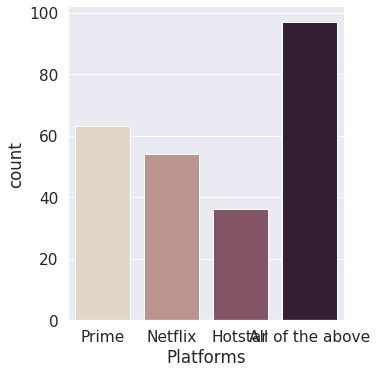

In [1525]:
sns.catplot(x="Platforms", kind="count", palette="ch:.25", data=data)


#Representation of most watched Types and Subscription

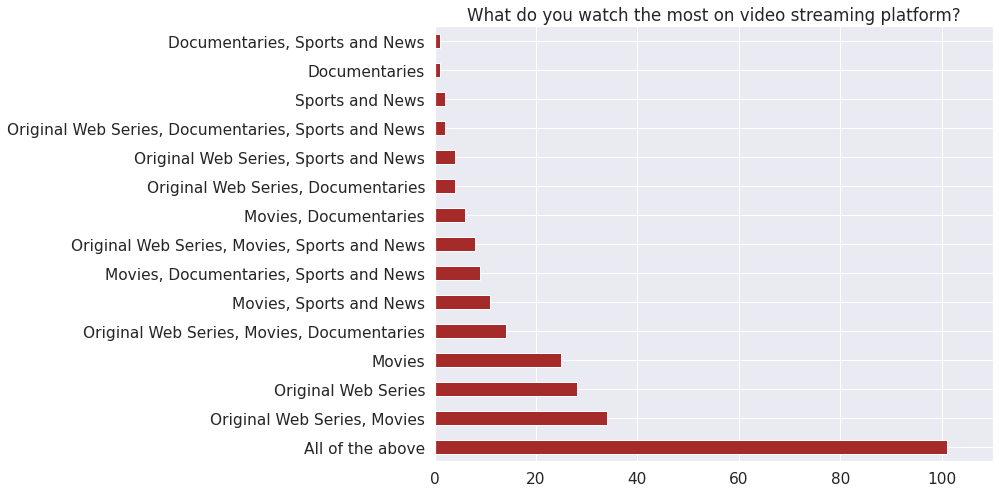

In [1526]:
data['Most_watched'].value_counts().plot(kind='barh',figsize=(10,8),color="brown")
plt.title("What do you watch the most on video streaming platform?")
plt.xlim(0,110)
plt.show()

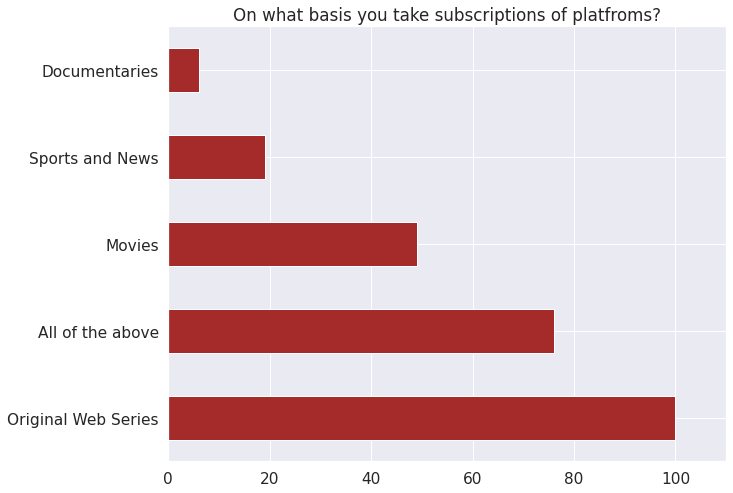

In [1527]:
data['Subscription'].value_counts().plot(kind='barh',figsize=(10,8),color="brown")
plt.title("On what basis you take subscriptions of platfroms?")
plt.xlim(0,110)
plt.show()

Here we can see that the highest count in most watched is all of the above and after that Original web series and movie and if we see in subscription graph Original web series has the highest count and after that all so we can say that Web series has high impact on subscription for any of the platforms.  

#Presentation of Netflix's Series Count 

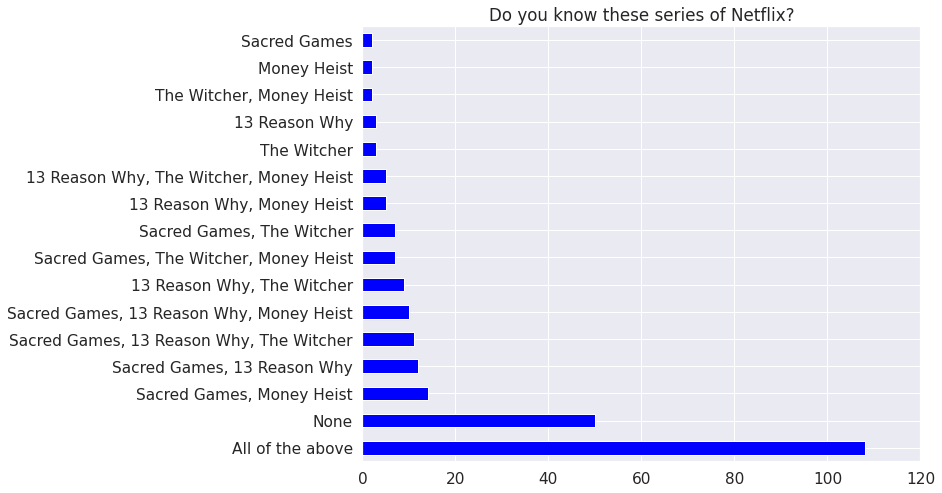

In [1528]:
data['Netflix_OgSeries'].value_counts().plot(kind='barh',figsize=(10,8),color="blue")
plt.title("Do you know these series of Netflix?")
plt.xlim(0,120)
plt.show()

#Presentation of Prime's Series Count

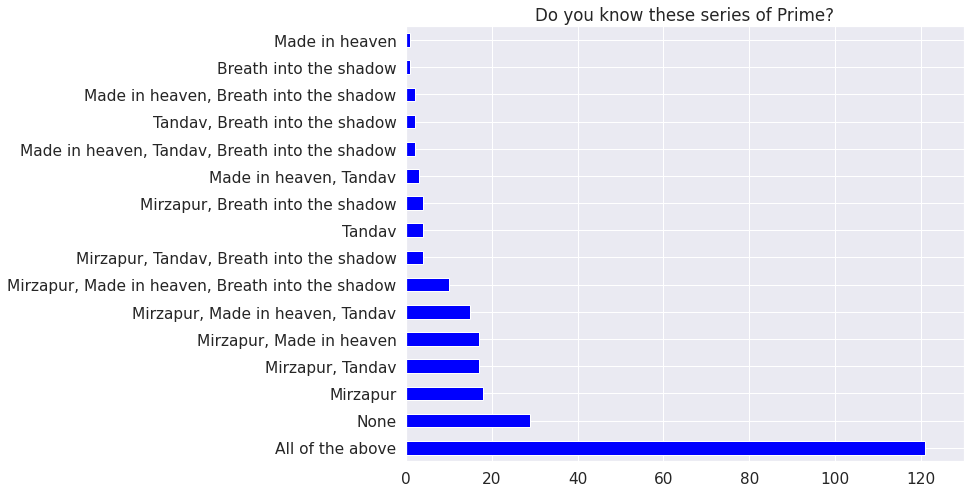

In [1529]:
data['Prime_OgSeries'].value_counts().plot(kind='barh',figsize=(10,8),color="blue")
plt.title("Do you know these series of Prime?")
plt.xlim(0,130)
plt.show()

#Presentation of Hotstar's Series Count 

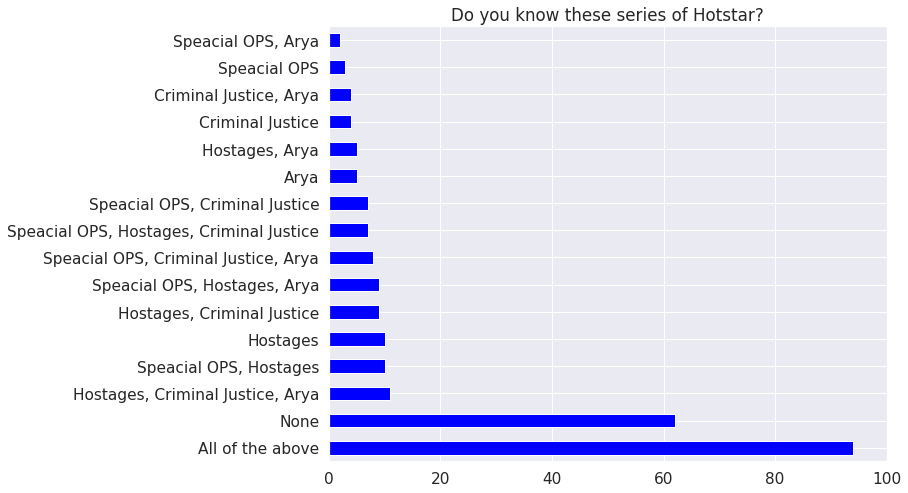

In [1530]:
data['Hotstar_OgSeries'].value_counts().plot(kind='barh',figsize=(10,8),color="blue")
plt.title("Do you know these series of Hotstar?")
plt.xlim(0,100)
plt.show()

#Selection of Genres 

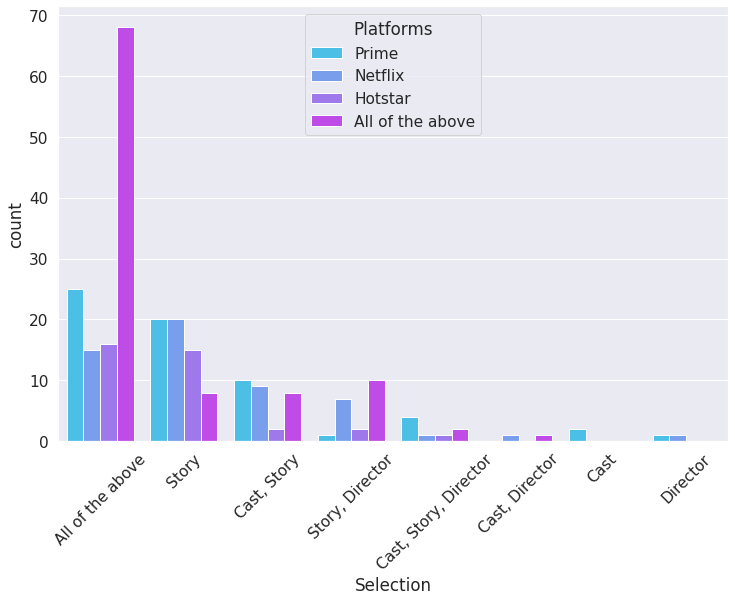

In [1531]:
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
ax = sns.countplot(x="Selection", hue="Platforms", data=data , palette="cool")

#Relation between Overall Rating ,Platform and Age

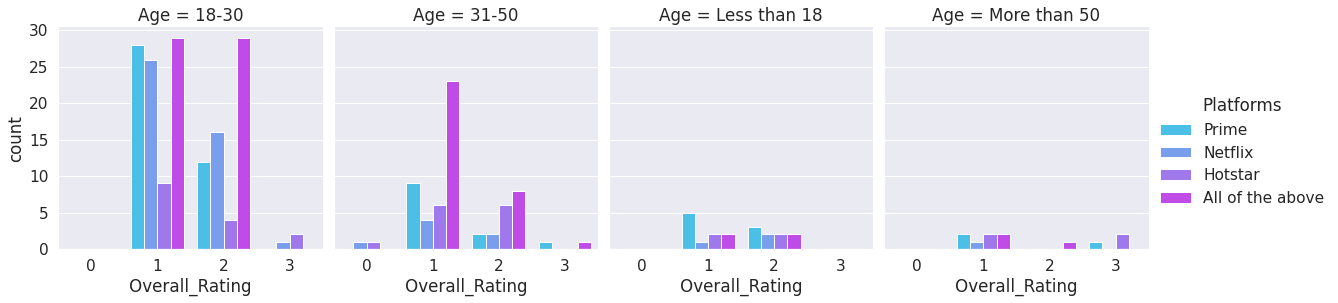

In [1532]:
g = sns.catplot(x="Overall_Rating", hue="Platforms", col="Age",
                data=data, kind="count",
                height=4, aspect=0.998,palette="cool");

#Relation between Most Watched and Platfroms.

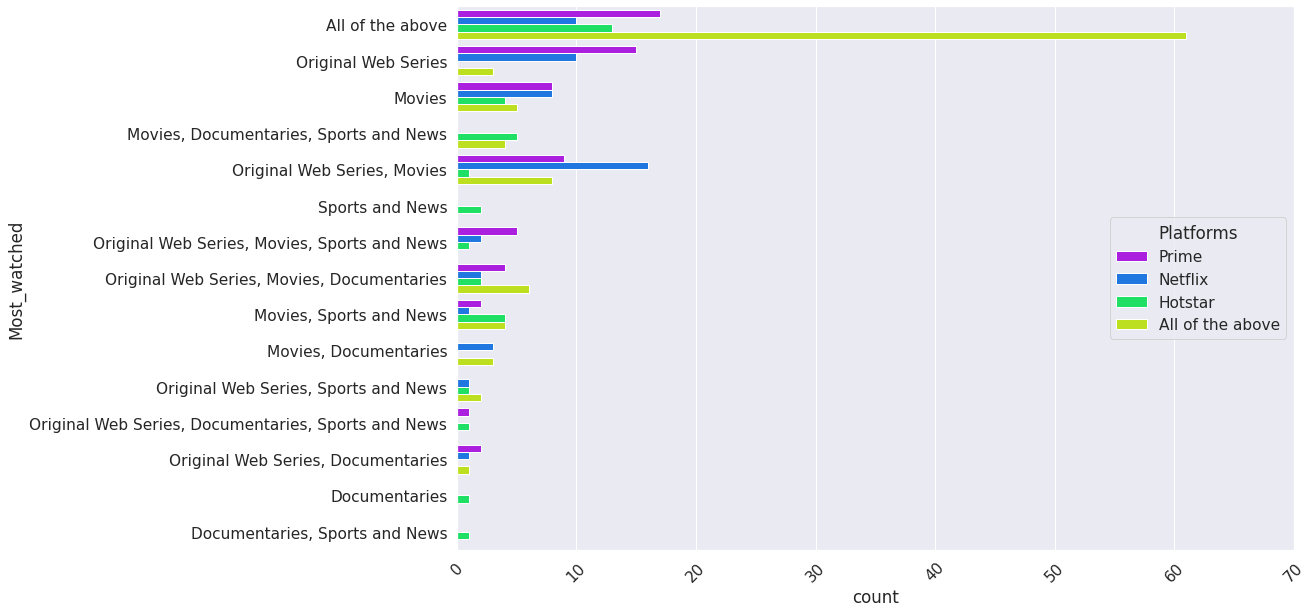

In [1533]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.xlim(0,70)
ax = sns.countplot(y="Most_watched", hue="Platforms", data=data , palette="hsv_r")

#Relation Between Subscription and Platfroms

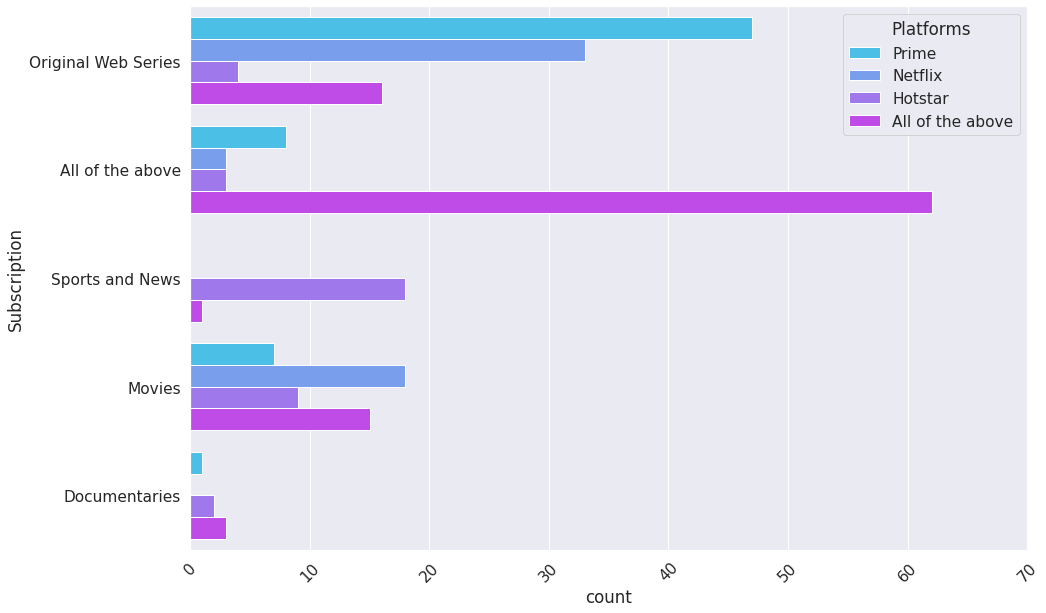

In [1534]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.xlim(0,70)
ax = sns.countplot(y="Subscription", hue="Platforms", data=data , palette="cool")

#Converting data into one_hot_encoding.

In [1535]:
data.columns

Index(['Timestamp', 'Video Streaming Platform(Y/N)', 'Age', 'Frequency',
       'Most_watched', 'Selection', 'Platforms', 'Subscription', 'Duration',
       'Netflix_Rating_Og', 'Netflix_Rating_movie',
       'Netflix_Rating_documentry', 'Netflix_Rating_others', 'Prime_Rating_Og',
       'Prime_Rating_movie', 'Prime_Rating_documentry', 'Prime_Rating_others',
       'Hotstar_Rating_Og', 'Hotstar_Rating_movie',
       'Hotstar_Rating_documentry', 'Hotstar_Rating_sports',
       'Netflix_OgSeries', 'Prime_OgSeries', 'Hotstar_OgSeries',
       'Advertisment', 'Features', 'Overall_Rating', 'Suggestion'],
      dtype='object')

In [1536]:
one_hot_data = pd.get_dummies(data[['Platforms','Age','Overall_Rating','Duration','Frequency','Most_watched']])
one_hot_data

,Overall_Rating,Duration,Frequency,Platforms_All of the above,Platforms_Hotstar,Platforms_Netflix,Platforms_Prime,Age_18-30,Age_31-50,Age_Less than 18,Age_More than 50,Most_watched_All of the above,Most_watched_Documentaries,"Most_watched_Documentaries, Sports and News",Most_watched_Movies,"Most_watched_Movies, Documentaries","Most_watched_Movies, Documentaries, Sports and News","Most_watched_Movies, Sports and News",Most_watched_Original Web Series,"Most_watched_Original Web Series, Documentaries","Most_watched_Original Web Series, Documentaries, Sports and News","Most_watched_Original Web Series, Movies","Most_watched_Original Web Series, Movies, Documentaries","Most_watched_Original Web Series, Movies, Sports and News","Most_watched_Original Web Series, Sports and News",Most_watched_Sports and News
0,2,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2,3,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2,2,2,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2,1,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2,1,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
246,1,2,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
247,2,3,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
248,1,3,3,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [1537]:
one_hot_data.columns

Index(['Overall_Rating', 'Duration', 'Frequency', 'Platforms_All of the above',
       'Platforms_Hotstar', 'Platforms_Netflix', 'Platforms_Prime',
       'Age_18-30', 'Age_31-50', 'Age_Less than 18', 'Age_More than 50',
       'Most_watched_All of the above', 'Most_watched_Documentaries',
       'Most_watched_Documentaries, Sports and News', 'Most_watched_Movies',
       'Most_watched_Movies, Documentaries',
       'Most_watched_Movies, Documentaries, Sports and News',
       'Most_watched_Movies, Sports and News',
       'Most_watched_Original Web Series',
       'Most_watched_Original Web Series, Documentaries',
       'Most_watched_Original Web Series, Documentaries, Sports and News',
       'Most_watched_Original Web Series, Movies',
       'Most_watched_Original Web Series, Movies, Documentaries',
       'Most_watched_Original Web Series, Movies, Sports and News',
       'Most_watched_Original Web Series, Sports and News',
       'Most_watched_Sports and News'],
      dtype='obje

In [1538]:
one_hot_data=one_hot_data.drop(['Platforms_All of the above','Age_Less than 18','Most_watched_Sports and News'],axis=1)

In [1539]:
#one_hot_data = pd.get_dummies(data[['Platforms','Age','Overall_Rating','Duration','Frequency','Most_watched']],drop_first=True)
one_hot_data

,Overall_Rating,Duration,Frequency,Platforms_Hotstar,Platforms_Netflix,Platforms_Prime,Age_18-30,Age_31-50,Age_More than 50,Most_watched_All of the above,Most_watched_Documentaries,"Most_watched_Documentaries, Sports and News",Most_watched_Movies,"Most_watched_Movies, Documentaries","Most_watched_Movies, Documentaries, Sports and News","Most_watched_Movies, Sports and News",Most_watched_Original Web Series,"Most_watched_Original Web Series, Documentaries","Most_watched_Original Web Series, Documentaries, Sports and News","Most_watched_Original Web Series, Movies","Most_watched_Original Web Series, Movies, Documentaries","Most_watched_Original Web Series, Movies, Sports and News","Most_watched_Original Web Series, Sports and News"
0,2,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,2,3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2,2,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,2,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
246,1,2,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
247,2,3,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
248,1,3,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [1540]:
one_hot_data.columns

Index(['Overall_Rating', 'Duration', 'Frequency', 'Platforms_Hotstar',
       'Platforms_Netflix', 'Platforms_Prime', 'Age_18-30', 'Age_31-50',
       'Age_More than 50', 'Most_watched_All of the above',
       'Most_watched_Documentaries',
       'Most_watched_Documentaries, Sports and News', 'Most_watched_Movies',
       'Most_watched_Movies, Documentaries',
       'Most_watched_Movies, Documentaries, Sports and News',
       'Most_watched_Movies, Sports and News',
       'Most_watched_Original Web Series',
       'Most_watched_Original Web Series, Documentaries',
       'Most_watched_Original Web Series, Documentaries, Sports and News',
       'Most_watched_Original Web Series, Movies',
       'Most_watched_Original Web Series, Movies, Documentaries',
       'Most_watched_Original Web Series, Movies, Sports and News',
       'Most_watched_Original Web Series, Sports and News'],
      dtype='object')

In [1541]:
one_hot_data.tail(20)

,Overall_Rating,Duration,Frequency,Platforms_Hotstar,Platforms_Netflix,Platforms_Prime,Age_18-30,Age_31-50,Age_More than 50,Most_watched_All of the above,Most_watched_Documentaries,"Most_watched_Documentaries, Sports and News",Most_watched_Movies,"Most_watched_Movies, Documentaries","Most_watched_Movies, Documentaries, Sports and News","Most_watched_Movies, Sports and News",Most_watched_Original Web Series,"Most_watched_Original Web Series, Documentaries","Most_watched_Original Web Series, Documentaries, Sports and News","Most_watched_Original Web Series, Movies","Most_watched_Original Web Series, Movies, Documentaries","Most_watched_Original Web Series, Movies, Sports and News","Most_watched_Original Web Series, Sports and News"
230,2,1,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
231,1,1,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
232,2,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
233,1,1,3,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
234,2,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
235,3,2,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
236,3,2,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
237,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
238,1,3,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
239,1,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1542]:
one_hot_data.tail(20)

,Overall_Rating,Duration,Frequency,Platforms_Hotstar,Platforms_Netflix,Platforms_Prime,Age_18-30,Age_31-50,Age_More than 50,Most_watched_All of the above,Most_watched_Documentaries,"Most_watched_Documentaries, Sports and News",Most_watched_Movies,"Most_watched_Movies, Documentaries","Most_watched_Movies, Documentaries, Sports and News","Most_watched_Movies, Sports and News",Most_watched_Original Web Series,"Most_watched_Original Web Series, Documentaries","Most_watched_Original Web Series, Documentaries, Sports and News","Most_watched_Original Web Series, Movies","Most_watched_Original Web Series, Movies, Documentaries","Most_watched_Original Web Series, Movies, Sports and News","Most_watched_Original Web Series, Sports and News"
230,2,1,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
231,1,1,2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
232,2,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
233,1,1,3,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
234,2,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
235,3,2,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
236,3,2,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
237,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
238,1,3,3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
239,1,3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1543]:
one_hot_data["Platforms_Netflix"].value_counts()

0    196
1     54
Name: Platforms_Netflix, dtype: int64

#Decision Tree

In [1544]:
one_hot_data.columns

Index(['Overall_Rating', 'Duration', 'Frequency', 'Platforms_Hotstar',
       'Platforms_Netflix', 'Platforms_Prime', 'Age_18-30', 'Age_31-50',
       'Age_More than 50', 'Most_watched_All of the above',
       'Most_watched_Documentaries',
       'Most_watched_Documentaries, Sports and News', 'Most_watched_Movies',
       'Most_watched_Movies, Documentaries',
       'Most_watched_Movies, Documentaries, Sports and News',
       'Most_watched_Movies, Sports and News',
       'Most_watched_Original Web Series',
       'Most_watched_Original Web Series, Documentaries',
       'Most_watched_Original Web Series, Documentaries, Sports and News',
       'Most_watched_Original Web Series, Movies',
       'Most_watched_Original Web Series, Movies, Documentaries',
       'Most_watched_Original Web Series, Movies, Sports and News',
       'Most_watched_Original Web Series, Sports and News'],
      dtype='object')

Real

In [1545]:
one_hot_data["Real"] = one_hot_data[ 'Most_watched_Documentaries'].map(str) + one_hot_data[ 'Most_watched_Documentaries, Sports and News'].map(str) 
one_hot_data.loc[(one_hot_data.Real == '01'),'Real']='1'
one_hot_data.loc[(one_hot_data.Real == '10'),'Real']='1'
one_hot_data.loc[(one_hot_data.Real == '00'),'Real']='0'
one_hot_data.loc[(one_hot_data.Real == '11'),'Real']='1'

Action

In [1546]:
one_hot_data["m1"] = one_hot_data['Most_watched_Movies'].map(str) + one_hot_data[  'Most_watched_Original Web Series, Movies'].map(str) 
one_hot_data.loc[(one_hot_data.m1 == '01'),'m1']='1'
one_hot_data.loc[(one_hot_data.m1 == '10'),'m1']='1'
one_hot_data.loc[(one_hot_data.m1 == '00'),'m1']='0'
one_hot_data.loc[(one_hot_data.m1 == '11'),'m1']='1'

In [1547]:
one_hot_data["MFinal"] = one_hot_data['m1'].map(str) + one_hot_data['Most_watched_Original Web Series'].map(str) 
one_hot_data.loc[(one_hot_data.MFinal == '01'),'MFinal']='1'
one_hot_data.loc[(one_hot_data.MFinal == '10'),'MFinal']='1'
one_hot_data.loc[(one_hot_data.MFinal == '00'),'MFinal']='0'
one_hot_data.loc[(one_hot_data.MFinal == '11'),'MFinal']='1'

Action_Real

In [1548]:
one_hot_data["Movie"] = one_hot_data["Most_watched_Original Web Series, Documentaries, Sports and News"].map(str) + one_hot_data["Most_watched_Original Web Series, Sports and News"].map(str)
one_hot_data.loc[(one_hot_data.Movie == '01'),'Movie']='1'
one_hot_data.loc[(one_hot_data.Movie == '10'),'Movie']='1'
one_hot_data.loc[(one_hot_data.Movie == '00'),'Movie']='0'
one_hot_data.loc[(one_hot_data.Movie == '11'),'Movie']='1'

In [1549]:
one_hot_data["M1"] = one_hot_data['Most_watched_Original Web Series, Documentaries'].map(str) + one_hot_data['Most_watched_Original Web Series, Movies, Documentaries'].map(str)
one_hot_data.loc[(one_hot_data.M1 == '01'),'M1']='1'
one_hot_data.loc[(one_hot_data.M1 == '10'),'M1']='1'
one_hot_data.loc[(one_hot_data.M1 == '00'),'M1']='0'
one_hot_data.loc[(one_hot_data.M1 == '11'),'M1']='1'

In [1550]:
one_hot_data["M"] = one_hot_data['Movie'].map(str) + one_hot_data['M1'].map(str)
one_hot_data.loc[(one_hot_data.M == '01'),'M']='1'
one_hot_data.loc[(one_hot_data.M== '10'),'M']='1'
one_hot_data.loc[(one_hot_data.M == '00'),'M']='0'
one_hot_data.loc[(one_hot_data.M == '11'),'M']='1'

In [1551]:
one_hot_data

,Overall_Rating,Duration,Frequency,Platforms_Hotstar,Platforms_Netflix,Platforms_Prime,Age_18-30,Age_31-50,Age_More than 50,Most_watched_All of the above,Most_watched_Documentaries,"Most_watched_Documentaries, Sports and News",Most_watched_Movies,"Most_watched_Movies, Documentaries","Most_watched_Movies, Documentaries, Sports and News","Most_watched_Movies, Sports and News",Most_watched_Original Web Series,"Most_watched_Original Web Series, Documentaries","Most_watched_Original Web Series, Documentaries, Sports and News","Most_watched_Original Web Series, Movies","Most_watched_Original Web Series, Movies, Documentaries","Most_watched_Original Web Series, Movies, Sports and News","Most_watched_Original Web Series, Sports and News",Real,m1,MFinal,Movie,M1,M
0,2,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,1,2,3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2,2,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0
246,1,2,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
247,2,3,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
248,1,3,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1552]:
one_hot_data["M3"] = one_hot_data['Most_watched_Movies, Documentaries'].map(str) + one_hot_data['Most_watched_Original Web Series, Movies, Sports and News'].map(str)
one_hot_data.loc[(one_hot_data.M3 == '01'),'M3']='1'
one_hot_data.loc[(one_hot_data.M3 == '10'),'M3']='1'
one_hot_data.loc[(one_hot_data.M3 == '00'),'M3']='0'
one_hot_data.loc[(one_hot_data.M3 == '11'),'M3']='1`'

In [1553]:
one_hot_data["M2"] = one_hot_data['Most_watched_Movies, Documentaries, Sports and News'].map(str) + one_hot_data['Most_watched_Movies, Documentaries'].map(str)
one_hot_data.loc[(one_hot_data.M2 == '01'),'M2']='1'
one_hot_data.loc[(one_hot_data.M2== '10'),'M2']='1'
one_hot_data.loc[(one_hot_data.M2 == '00'),'M2']='0'
one_hot_data.loc[(one_hot_data.M2 == '11'),'M2']='1'

In [1554]:
one_hot_data["MM"] = one_hot_data['M3'].map(str) + one_hot_data['M2'].map(str)
one_hot_data.loc[(one_hot_data.MM == '01'),'MM']='1'
one_hot_data.loc[(one_hot_data.MM== '10'),'MM']='1'
one_hot_data.loc[(one_hot_data.MM == '00'),'MM']='0'
one_hot_data.loc[(one_hot_data.MM == '11'),'MM']='1'

In [1555]:
one_hot_data["Action_Real"] = one_hot_data['M'].map(str) + one_hot_data['MM'].map(str)
one_hot_data.loc[(one_hot_data.Action_Real == '01'),'Action_Real']='1'
one_hot_data.loc[(one_hot_data.Action_Real== '10'),'Action_Real']='1'
one_hot_data.loc[(one_hot_data.Action_Real == '00'),'Action_Real']='0'
one_hot_data.loc[(one_hot_data.Action_Real == '11'),'Action_Real']='1'

In [1556]:
one_hot_data

,Overall_Rating,Duration,Frequency,Platforms_Hotstar,Platforms_Netflix,Platforms_Prime,Age_18-30,Age_31-50,Age_More than 50,Most_watched_All of the above,Most_watched_Documentaries,"Most_watched_Documentaries, Sports and News",Most_watched_Movies,"Most_watched_Movies, Documentaries","Most_watched_Movies, Documentaries, Sports and News","Most_watched_Movies, Sports and News",Most_watched_Original Web Series,"Most_watched_Original Web Series, Documentaries","Most_watched_Original Web Series, Documentaries, Sports and News","Most_watched_Original Web Series, Movies","Most_watched_Original Web Series, Movies, Documentaries","Most_watched_Original Web Series, Movies, Sports and News","Most_watched_Original Web Series, Sports and News",Real,m1,MFinal,Movie,M1,M,M3,M2,MM,Action_Real
0,2,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2,3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,2,2,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,2,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
246,1,2,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
247,2,3,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,1,3,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1557]:
one_hot_data['Action_Real'].value_counts()

0    203
1     47
Name: Action_Real, dtype: int64

In [1558]:
one_hot_data.columns

Index(['Overall_Rating', 'Duration', 'Frequency', 'Platforms_Hotstar',
       'Platforms_Netflix', 'Platforms_Prime', 'Age_18-30', 'Age_31-50',
       'Age_More than 50', 'Most_watched_All of the above',
       'Most_watched_Documentaries',
       'Most_watched_Documentaries, Sports and News', 'Most_watched_Movies',
       'Most_watched_Movies, Documentaries',
       'Most_watched_Movies, Documentaries, Sports and News',
       'Most_watched_Movies, Sports and News',
       'Most_watched_Original Web Series',
       'Most_watched_Original Web Series, Documentaries',
       'Most_watched_Original Web Series, Documentaries, Sports and News',
       'Most_watched_Original Web Series, Movies',
       'Most_watched_Original Web Series, Movies, Documentaries',
       'Most_watched_Original Web Series, Movies, Sports and News',
       'Most_watched_Original Web Series, Sports and News', 'Real', 'm1',
       'MFinal', 'Movie', 'M1', 'M', 'M3', 'M2', 'MM', 'Action_Real'],
      dtype='object')

#Netflix

In [1559]:
train, test = train_test_split(one_hot_data, test_size =0.30)

In [1560]:
train.shape

(175, 33)

In [1561]:
test.shape

(75, 33)

In [1562]:
features=['Overall_Rating','Frequency','Age_18-30','Age_31-50', 'Age_More than 50','Most_watched_All of the above','Action_Real','MFinal','Real']

In [1563]:
X_train =train[features]
Y_train =train["Platforms_Netflix"]

X_test = test[features]
Y_test = test["Platforms_Netflix"]

In [1564]:
from sklearn.model_selection import GridSearchCV

In [1565]:
gdtree = DecisionTreeClassifier()

In [1566]:
param_dict ={ 
    "criterion": ['gini', 'entropy'], 
    "min_samples_split":range(2,100)
    }

In [1567]:
grid =GridSearchCV(gdtree,param_grid=param_dict, cv=5)

In [1568]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [1569]:
grid.best_params_

{'criterion': 'entropy', 'min_samples_split': 10}

In [1570]:
grid.best_score_

0.8114285714285714

In [1571]:
from sklearn.metrics import accuracy_score

In [1572]:
gt1=DecisionTreeClassifier(
    criterion='gini',
    min_samples_split=24)

In [1573]:
gt_fit = gt1.fit(X_train, Y_train)
gt_p1 = gt1.predict(X_train)

In [1574]:
gtrain_score = accuracy_score(Y_train, gt_p1)*100
gtrain_score

82.28571428571428

In [1575]:
gt_pt1 = gt1.predict(X_test)
gtest_score = accuracy_score(Y_test, gt_pt1)*100
gtest_score

81.33333333333333

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        60
           1       0.55      0.40      0.46        15

    accuracy                           0.81        75
   macro avg       0.70      0.66      0.67        75
weighted avg       0.80      0.81      0.80        75



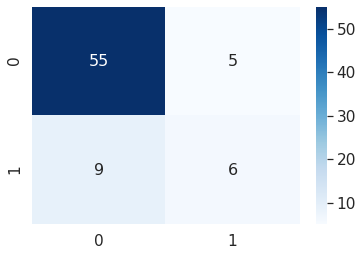

In [1576]:
print(classification_report(Y_test, gt_pt1))
rf_cm = confusion_matrix(Y_test, gt_pt1)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#RF for Netflix

In [1577]:
train, test = train_test_split(one_hot_data, test_size =0.30)

In [1578]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,precision_score

In [1579]:
#Build Random Forest model
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1580]:
rf1_model_pred = rf1.predict(X_test)

In [1581]:
test_score_rf = accuracy_score(Y_test, rf1_model_pred)*100
test_score_rf

77.33333333333333

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        60
           1       0.38      0.20      0.26        15

    accuracy                           0.77        75
   macro avg       0.60      0.56      0.56        75
weighted avg       0.73      0.77      0.75        75



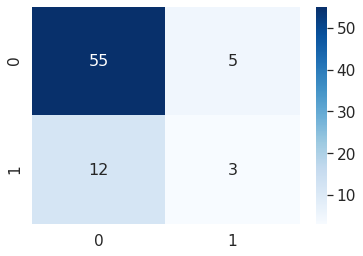

In [1582]:
print(classification_report(Y_test, rf1_model_pred))
rf_cm = confusion_matrix(Y_test, rf1_model_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

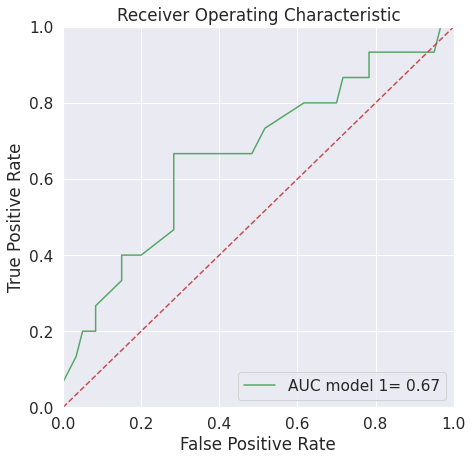

In [1583]:
rf_model1_test = rf1.predict_proba(X_test)

#Plot AUC-ROC
fpr1, tpr1, threshold1 = roc_curve(Y_test, rf_model1_test[:,1])
roc_auc1 = auc(fpr1, tpr1)
#fpr2, tpr2, threshold2 = roc_curve(y_test, rf_model2_test[:,1])
#roc_auc2 = auc(fpr2, tpr2)
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'g', label = 'AUC model 1= %0.2f' % roc_auc1)
#plt.plot(fpr2, tpr2, 'b', label = 'AUC model 2= %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#SVM for Netflix

In [1584]:
train, test = train_test_split(one_hot_data, test_size =0.30)

In [1585]:
from sklearn import svm

In [1586]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=4)

In [1587]:
model_svm = svmf.fit(X_train, Y_train)

In [1588]:
pred_svm = model_svm.predict(X_test)

In [1589]:
test_score_svm = accuracy_score(Y_test, pred_svm)*100
test_score_svm

78.66666666666666

              precision    recall  f1-score   support

           0       0.83      0.92      0.87        60
           1       0.44      0.27      0.33        15

    accuracy                           0.79        75
   macro avg       0.64      0.59      0.60        75
weighted avg       0.76      0.79      0.77        75



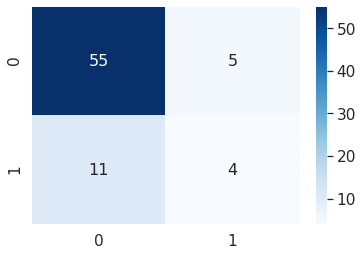

In [1590]:
print(classification_report(Y_test, pred_svm))
rf_cm = confusion_matrix(Y_test, pred_svm)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [1591]:
random_forest = RandomForestClassifier()

In [1592]:
random_forest_grid_params ={
    'max_depth' : range(5,60,5),
    'n_estimators' : range(5,60,5)
}

In [1593]:
grid_for_rf_1 = GridSearchCV(random_forest,random_forest_grid_params, cv = 10) 
grid_for_rf_1.fit (X_train, Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [1594]:
grid_for_rf_2 = GridSearchCV(random_forest,random_forest_grid_params, cv = 5) 
grid_for_rf_2.fit (X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [1595]:
print(f'Grid1 {grid_for_rf_1.best_params_, grid_for_rf_1.best_score_}')
print(f'Grid2 {grid_for_rf_2.best_params_, grid_for_rf_2.best_score_}')

Grid1 ({'max_depth': 5, 'n_estimators': 50}, 0.8062091503267974)
Grid2 ({'max_depth': 5, 'n_estimators': 15}, 0.8057142857142857)


In [1596]:
rf_temp1 =  RandomForestClassifier(max_depth= 40, n_estimators= 5)

In [1597]:
rf_temp1_fit = rf_temp1.fit(X_train, Y_train)
rf_temp1_train_predict = rf_temp1.predict(X_train)

rf_temp1_train_predict_score = accuracy_score(Y_train, rf_temp1_train_predict) *100
rf_temp1_train_predict_score

82.85714285714286

In [1598]:
rf_temp1_test_predict = rf_temp1.predict(X_test)
rf_temp1_test_predict_score = accuracy_score(Y_test, rf_temp1_test_predict) *100
rf_temp1_test_predict_score

80.0

In [1599]:
print(classification_report(Y_test, rf_temp1_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        60
           1       0.50      0.33      0.40        15

    accuracy                           0.80        75
   macro avg       0.67      0.62      0.64        75
weighted avg       0.78      0.80      0.78        75



#KNN for Netflix

In [1600]:
from sklearn.neighbors import KNeighborsClassifier

In [1601]:
X =train[features]
y =train["Platforms_Netflix"]



In [1602]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

In [1603]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [1604]:
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

In [1605]:
 # Compute traning and test data accuracy
train_accuracy[i] = knn.score(X_train, y_train)
test_accuracy[i] = knn.score(X_test, y_test)

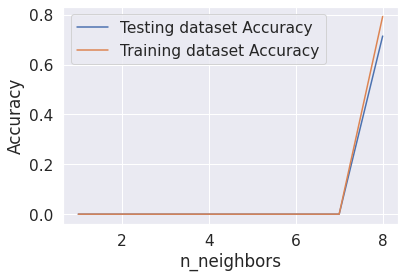

In [1606]:
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Graph

In [ ]:
modelacc = pd.DataFrame({"Netflix_DT": [gtest_score],
                               "Prime_DT": [prime_score],
                               "Hotstar_DT": [hotstar_score],
                              })
modelacc.plot.bar(align='edge', width=1,figsize=(10,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=15);

#**Prime**

#Decision Tree:Prime

In [1607]:
train, test = train_test_split(one_hot_data, test_size =0.30)

In [1608]:
train.shape

(175, 33)

In [1609]:
test.shape

(75, 33)

In [1610]:
one_hot_data.columns

Index(['Overall_Rating', 'Duration', 'Frequency', 'Platforms_Hotstar',
       'Platforms_Netflix', 'Platforms_Prime', 'Age_18-30', 'Age_31-50',
       'Age_More than 50', 'Most_watched_All of the above',
       'Most_watched_Documentaries',
       'Most_watched_Documentaries, Sports and News', 'Most_watched_Movies',
       'Most_watched_Movies, Documentaries',
       'Most_watched_Movies, Documentaries, Sports and News',
       'Most_watched_Movies, Sports and News',
       'Most_watched_Original Web Series',
       'Most_watched_Original Web Series, Documentaries',
       'Most_watched_Original Web Series, Documentaries, Sports and News',
       'Most_watched_Original Web Series, Movies',
       'Most_watched_Original Web Series, Movies, Documentaries',
       'Most_watched_Original Web Series, Movies, Sports and News',
       'Most_watched_Original Web Series, Sports and News', 'Real', 'm1',
       'MFinal', 'Movie', 'M1', 'M', 'M3', 'M2', 'MM', 'Action_Real'],
      dtype='object')

In [1611]:
X_train =train[features]
Y_train =train["Platforms_Prime"]

X_test = test[features]
Y_test = test["Platforms_Prime"]

In [1612]:
gdtree = DecisionTreeClassifier()

In [1613]:
param_dict ={ 
    "criterion": ['gini', 'entropy'], 
    "min_samples_split":range(2,100)
    
    }

In [1614]:
grid1 =GridSearchCV(gdtree,param_grid=param_dict, cv=10)

In [1615]:
grid1.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [1616]:
grid1.best_params_

{'criterion': 'gini', 'min_samples_split': 44}

In [1617]:
grid1.best_score_

0.7718954248366013

In [1618]:
gt1=DecisionTreeClassifier(
    criterion='gini',
    min_samples_split=67)


In [1619]:
gt_fit = gt1.fit(X_train, Y_train)
gt_p1 = gt1.predict(X_train)
gtrain_score = accuracy_score(Y_train, gt_p1)*100
gtrain_score

77.71428571428571

In [1620]:
gt_pt1 = gt1.predict(X_test)
prime_score = accuracy_score(Y_test, gt_pt1)*100
prime_score

72.0

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        59
           1       0.22      0.12      0.16        16

    accuracy                           0.72        75
   macro avg       0.51      0.50      0.50        75
weighted avg       0.67      0.72      0.69        75



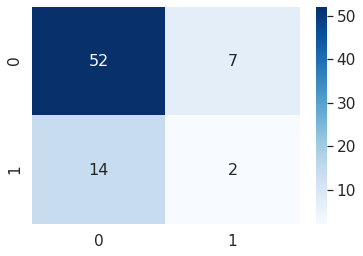

In [1621]:
print(classification_report(Y_test, gt_pt1))
rf_cm = confusion_matrix(Y_test, gt_pt1)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#RF:Prime

In [1622]:
train, test = train_test_split(one_hot_data, test_size =0.30)

In [1623]:
#Build Random Forest model
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1624]:
rf2_model_pred = rf1.predict(X_test)

In [1625]:
test_score_rf2 = accuracy_score(Y_test, rf2_model_pred)*100
test_score_rf2

74.66666666666667

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        59
           1       0.29      0.12      0.17        16

    accuracy                           0.75        75
   macro avg       0.54      0.52      0.51        75
weighted avg       0.69      0.75      0.71        75



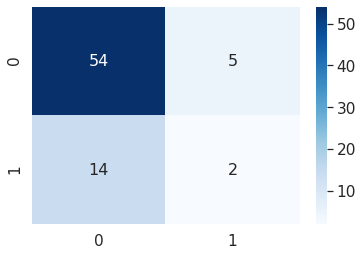

In [1626]:
print(classification_report(Y_test, rf2_model_pred))
rf_cm = confusion_matrix(Y_test, rf2_model_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#**Hotstar**

#Decision Tree:Hotstar

In [1627]:
train, test = train_test_split(one_hot_data, test_size =0.35)

In [1628]:
X_train =train[features]
Y_train =train["Platforms_Hotstar"]

X_test = test[features]
Y_test = test["Platforms_Hotstar"]

In [1629]:
param_dict ={ 
    "criterion": ['gini', 'entropy'], 
    "min_samples_split":range(2,100)
    
    }

In [1630]:
grid2 =GridSearchCV(gdtree,param_grid=param_dict, cv=10)

In [1631]:
grid2.fit(X_train,Y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [1632]:
grid2.best_params_

{'criterion': 'gini', 'min_samples_split': 35}

In [1633]:
grid2.best_score_

0.8459558823529412

In [1634]:
gt2=DecisionTreeClassifier(
    criterion='gini',
    min_samples_split=29)


In [1635]:
gt_fit = gt2.fit(X_train, Y_train)
gt_p1 = gt2.predict(X_train)
gtrain_score = accuracy_score(Y_train, gt_p1)*100
gtrain_score

87.03703703703704

In [1636]:
gt_pt1 = gt2.predict(X_test)
hotstar_score = accuracy_score(Y_test, gt_pt1)*100
hotstar_score

84.0909090909091

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        77
           1       0.29      0.18      0.22        11

    accuracy                           0.84        88
   macro avg       0.59      0.56      0.57        88
weighted avg       0.81      0.84      0.83        88



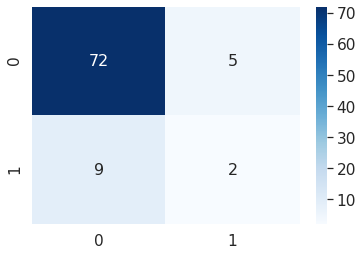

In [1637]:
print(classification_report(Y_test, gt_pt1))
rf_cm = confusion_matrix(Y_test, gt_pt1)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#RF:Hotstar

In [1638]:
train, test = train_test_split(one_hot_data, test_size =0.30)

In [1639]:
#Build Random Forest model
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1640]:
rf3_model_pred = rf1.predict(X_test)

In [1641]:
test_score_rf2 = accuracy_score(Y_test, rf3_model_pred)*100
test_score_rf2

84.0909090909091

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        77
           1       0.20      0.09      0.13        11

    accuracy                           0.84        88
   macro avg       0.54      0.52      0.52        88
weighted avg       0.79      0.84      0.81        88



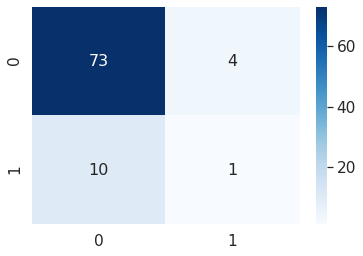

In [1642]:
print(classification_report(Y_test, rf3_model_pred))
rf_cm = confusion_matrix(Y_test, rf3_model_pred)
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#Comparison of accuracy of the decision tree.

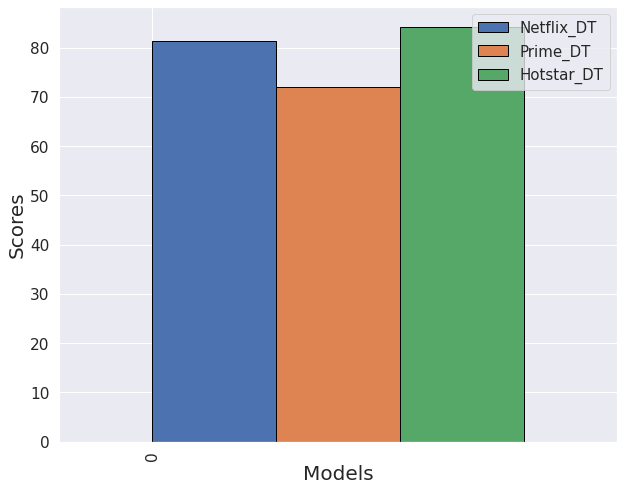

In [1643]:
modelacc = pd.DataFrame({"Netflix_DT": [gtest_score],
                               "Prime_DT": [prime_score],
                               "Hotstar_DT": [hotstar_score],
                              })
modelacc.plot.bar(align='edge', width=1,figsize=(10,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=15);

**SVM**

#svm for Netflix

In [1644]:
one_hot_data

,Overall_Rating,Duration,Frequency,Platforms_Hotstar,Platforms_Netflix,Platforms_Prime,Age_18-30,Age_31-50,Age_More than 50,Most_watched_All of the above,Most_watched_Documentaries,"Most_watched_Documentaries, Sports and News",Most_watched_Movies,"Most_watched_Movies, Documentaries","Most_watched_Movies, Documentaries, Sports and News","Most_watched_Movies, Sports and News",Most_watched_Original Web Series,"Most_watched_Original Web Series, Documentaries","Most_watched_Original Web Series, Documentaries, Sports and News","Most_watched_Original Web Series, Movies","Most_watched_Original Web Series, Movies, Documentaries","Most_watched_Original Web Series, Movies, Sports and News","Most_watched_Original Web Series, Sports and News",Real,m1,MFinal,Movie,M1,M,M3,M2,MM,Action_Real
0,2,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,2,3,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
3,2,2,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,2,1,3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2,1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
246,1,2,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
247,2,3,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
248,1,3,3,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1645]:
from sklearn import svm

In [1646]:
train, test = train_test_split(one_hot_data, test_size =0.35)

In [1647]:
train.shape

(162, 33)

In [1648]:
test.shape

(88, 33)

In [1649]:
X_train =train[features]
Y_train =train["Platforms_Netflix"]

X_test = test[features]
Y_test = test["Platforms_Netflix"]

In [1650]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [1651]:
model_svm = svmf.fit(X_train, Y_train)

In [1652]:
pred_svm = model_svm.predict(X_test)

In [1653]:
test_score_svm_netflix= accuracy_score(Y_test, pred_svm)*100
test_score_svm_netflix

67.04545454545455

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        64
           1       0.22      0.08      0.12        24

    accuracy                           0.67        88
   macro avg       0.47      0.49      0.46        88
weighted avg       0.59      0.67      0.61        88



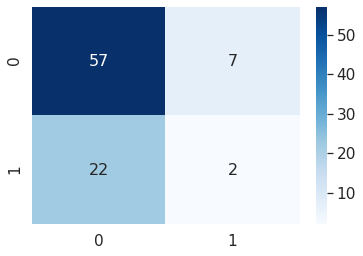

In [1654]:
print(classification_report(Y_test, pred_svm ))
rf_cm = confusion_matrix(Y_test, pred_svm )
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#SVM for Prime

In [1655]:
train, test = train_test_split(one_hot_data, test_size =0.20)

In [1656]:
train.shape

(200, 33)

In [1657]:
test.shape

(50, 33)

In [1658]:
features=['Overall_Rating','Most_watched_Original Web Series','Most_watched_Movies','Most_watched_Original Web Series, Movies','Most_watched_Movies', 'Most_watched_Original Web Series, Movies, Documentaries','Most_watched_Original Web Series, Documentaries','Age_31-50']

In [1659]:
X_train =train[features]
Y_train =train["Platforms_Prime"]

X_test = test[features]
Y_test = test["Platforms_Prime"]

In [1660]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [1661]:
model_svm = svmf.fit(X_train, Y_train)

In [1662]:
pred_svm = model_svm.predict(X_test)

In [1663]:
test_score_svm = accuracy_score(Y_test, pred_svm)*100
test_score_svm

64.0

              precision    recall  f1-score   support

           0       0.69      0.89      0.78        35
           1       0.20      0.07      0.10        15

    accuracy                           0.64        50
   macro avg       0.44      0.48      0.44        50
weighted avg       0.54      0.64      0.57        50



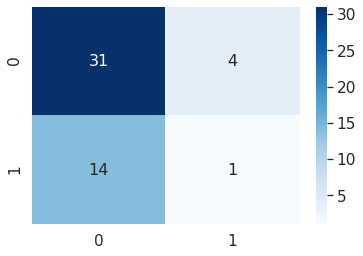

In [1664]:
print(classification_report(Y_test, pred_svm ))
rf_cm = confusion_matrix(Y_test, pred_svm )
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

#for Hotstar

In [1665]:
train, test = train_test_split(one_hot_data, test_size =0.35)

In [1666]:
train.shape

(162, 33)

In [1667]:
test.shape

(88, 33)

In [1668]:
X_train =train[features]
Y_train =train["Platforms_Hotstar"]

X_test = test[features]
Y_test = test["Platforms_Hotstar"]

In [1669]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [1670]:
model_svm = svmf.fit(X_train, Y_train)

In [1671]:
pred_svm = model_svm.predict(X_test)

In [1672]:
test_score_svm_hotstar = accuracy_score(Y_test, pred_svm)*100
test_score_svm_hotstar

85.22727272727273

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92        75
           1       0.00      0.00      0.00        13

    accuracy                           0.85        88
   macro avg       0.43      0.50      0.46        88
weighted avg       0.73      0.85      0.78        88



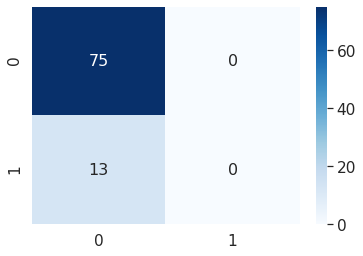

In [1673]:
print(classification_report(Y_test, pred_svm ))
rf_cm = confusion_matrix(Y_test, pred_svm )
df_cm3 = pd.DataFrame(rf_cm, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

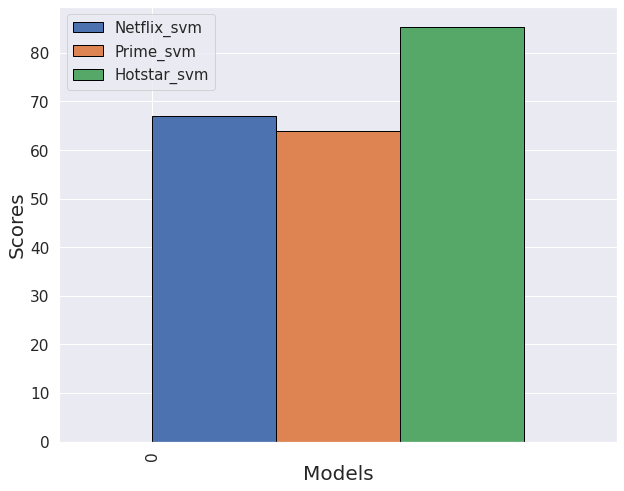

In [1674]:
modelacc = pd.DataFrame({"Netflix_svm": [test_score_svm_netflix],
                               "Prime_svm": [test_score_svm],
                               "Hotstar_svm": [test_score_svm_hotstar],
                              })
modelacc.plot.bar(align='edge', width=1,figsize=(10,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=15);

**LR**

Netflix

In [1675]:
one_hot_data1 = pd.get_dummies(data[['Platforms','Most_watched','Age','Netflix_Rating_Og','Prime_Rating_Og','Hotstar_Rating_Og','Netflix_Rating_movie',
       'Netflix_Rating_documentry', 'Netflix_Rating_others','Prime_Rating_movie', 'Prime_Rating_documentry', 'Prime_Rating_others','Hotstar_Rating_movie',
       'Hotstar_Rating_documentry', 'Hotstar_Rating_sports']])
one_hot_data1

,Netflix_Rating_Og,Prime_Rating_Og,Hotstar_Rating_Og,Netflix_Rating_movie,Netflix_Rating_documentry,Netflix_Rating_others,Prime_Rating_movie,Prime_Rating_documentry,Prime_Rating_others,Hotstar_Rating_movie,Hotstar_Rating_documentry,Hotstar_Rating_sports,Platforms_All of the above,Platforms_Hotstar,Platforms_Netflix,Platforms_Prime,Most_watched_All of the above,Most_watched_Documentaries,"Most_watched_Documentaries, Sports and News",Most_watched_Movies,"Most_watched_Movies, Documentaries","Most_watched_Movies, Documentaries, Sports and News","Most_watched_Movies, Sports and News",Most_watched_Original Web Series,"Most_watched_Original Web Series, Documentaries","Most_watched_Original Web Series, Documentaries, Sports and News","Most_watched_Original Web Series, Movies","Most_watched_Original Web Series, Movies, Documentaries","Most_watched_Original Web Series, Movies, Sports and News","Most_watched_Original Web Series, Sports and News",Most_watched_Sports and News,Age_18-30,Age_31-50,Age_Less than 18,Age_More than 50
0,4,5,3,4,4,3,5,5,5,2,2,2,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5,4,3,5,5,5,4,3,1,2,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,5,4,4,4,4,4,3,4,4,5,4,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,4,1,1,1,1,1,1,4,5,5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,4,3,4,2,1,5,4,4,3,3,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4,5,5,5,4,4,4,4,5,4,4,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
246,5,5,5,4,4,4,5,4,4,5,4,4,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
247,5,5,5,4,4,3,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
248,5,5,5,4,4,3,4,4,4,4,4,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [1676]:
one_hot_data1 = pd.get_dummies(data[['Platforms','Most_watched','Age','Netflix_Rating_Og','Prime_Rating_Og','Hotstar_Rating_Og','Netflix_Rating_movie',
       'Netflix_Rating_documentry', 'Netflix_Rating_others','Prime_Rating_movie', 'Prime_Rating_documentry', 'Prime_Rating_others','Hotstar_Rating_movie',
       'Hotstar_Rating_documentry', 'Hotstar_Rating_sports']],drop_first=True)
one_hot_data1

,Netflix_Rating_Og,Prime_Rating_Og,Hotstar_Rating_Og,Netflix_Rating_movie,Netflix_Rating_documentry,Netflix_Rating_others,Prime_Rating_movie,Prime_Rating_documentry,Prime_Rating_others,Hotstar_Rating_movie,Hotstar_Rating_documentry,Hotstar_Rating_sports,Platforms_Hotstar,Platforms_Netflix,Platforms_Prime,Most_watched_Documentaries,"Most_watched_Documentaries, Sports and News",Most_watched_Movies,"Most_watched_Movies, Documentaries","Most_watched_Movies, Documentaries, Sports and News","Most_watched_Movies, Sports and News",Most_watched_Original Web Series,"Most_watched_Original Web Series, Documentaries","Most_watched_Original Web Series, Documentaries, Sports and News","Most_watched_Original Web Series, Movies","Most_watched_Original Web Series, Movies, Documentaries","Most_watched_Original Web Series, Movies, Sports and News","Most_watched_Original Web Series, Sports and News",Most_watched_Sports and News,Age_31-50,Age_Less than 18,Age_More than 50
0,4,5,3,4,4,3,5,5,5,2,2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,4,3,5,5,5,4,3,1,2,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,5,4,4,4,4,4,3,4,4,5,4,5,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,4,1,1,1,1,1,1,4,5,5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,3,4,3,4,2,1,5,4,4,3,3,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4,5,5,5,4,4,4,4,5,4,4,5,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
246,5,5,5,4,4,4,5,4,4,5,4,4,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
247,5,5,5,4,4,3,4,4,4,4,4,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
248,5,5,5,4,4,3,4,4,4,4,4,5,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [1677]:
one_hot_data1.columns

Index(['Netflix_Rating_Og', 'Prime_Rating_Og', 'Hotstar_Rating_Og',
       'Netflix_Rating_movie', 'Netflix_Rating_documentry',
       'Netflix_Rating_others', 'Prime_Rating_movie',
       'Prime_Rating_documentry', 'Prime_Rating_others',
       'Hotstar_Rating_movie', 'Hotstar_Rating_documentry',
       'Hotstar_Rating_sports', 'Platforms_Hotstar', 'Platforms_Netflix',
       'Platforms_Prime', 'Most_watched_Documentaries',
       'Most_watched_Documentaries, Sports and News', 'Most_watched_Movies',
       'Most_watched_Movies, Documentaries',
       'Most_watched_Movies, Documentaries, Sports and News',
       'Most_watched_Movies, Sports and News',
       'Most_watched_Original Web Series',
       'Most_watched_Original Web Series, Documentaries',
       'Most_watched_Original Web Series, Documentaries, Sports and News',
       'Most_watched_Original Web Series, Movies',
       'Most_watched_Original Web Series, Movies, Documentaries',
       'Most_watched_Original Web Series, Movie

In [1678]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


In [1679]:
lr = LogisticRegression()
columns =['Platforms_Netflix','Age_31-50','Age_Less than 18','Age_More than 50']
lr.fit(one_hot_data1[columns], one_hot_data1['Netflix_Rating_Og'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1680]:
X = one_hot_data1[columns]
y = one_hot_data1['Netflix_Rating_Og']

train_X, val_X, train_y, val_y = train_test_split(
    X, y, test_size=0.20,random_state=0)

In [1681]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions_netflix = lr.predict(val_X)
accuracy_netflix = accuracy_score(val_y, predictions_netflix)
print(accuracy_netflix)
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions_netflix))

0.6
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.61      0.97      0.75        31

    accuracy                           0.60        50
   macro avg       0.12      0.19      0.15        50
weighted avg       0.38      0.60      0.47        50



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Prime**

In [1682]:
lr = LogisticRegression()
columns =['Platforms_Prime','Age_31-50','Age_Less than 18','Age_More than 50']
lr.fit(one_hot_data1[columns], one_hot_data1['Prime_Rating_Og'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1683]:
X = one_hot_data1[columns]
y = one_hot_data1['Prime_Rating_Og']

train_X, val_X, train_y, val_y = train_test_split(
    X, y, test_size=0.25,random_state=0)

In [1684]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions_prime = lr.predict(val_X)
accuracy_prime = accuracy_score(val_y, predictions_prime)
print(accuracy_prime)
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions_prime))

0.6349206349206349
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        13
           5       0.63      1.00      0.78        40

    accuracy                           0.63        63
   macro avg       0.13      0.20      0.16        63
weighted avg       0.40      0.63      0.49        63



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Hotstar

In [1685]:
lr = LogisticRegression()
columns =['Platforms_Hotstar','Age_31-50', 'Age_Less than 18','Age_More than 50']
lr.fit(one_hot_data1[columns], one_hot_data1['Hotstar_Rating_Og'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1686]:
X = one_hot_data1[columns]
y = one_hot_data1['Hotstar_Rating_Og']

train_X, val_X, train_y, val_y = train_test_split(
    X, y, test_size=0.30,random_state=0)

In [1687]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions_hotstar = lr.predict(val_X)
accuracy_hotstar = accuracy_score(val_y, predictions_hotstar)
print(accuracy_hotstar)
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions_hotstar))

0.5066666666666667
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00        12
           4       0.40      0.27      0.32        15
           5       0.52      0.94      0.67        36

    accuracy                           0.51        75
   macro avg       0.18      0.24      0.20        75
weighted avg       0.33      0.51      0.39        75



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


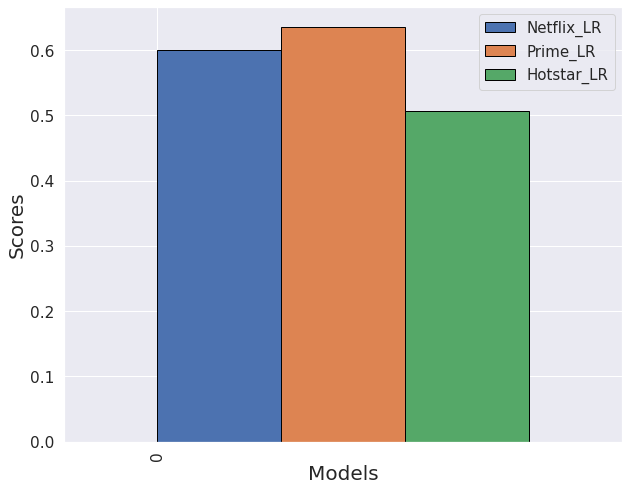

In [1688]:
modelacc = pd.DataFrame({"Netflix_LR": [accuracy_netflix],
                               "Prime_LR": [accuracy_prime],
                               "Hotstar_LR": [accuracy_hotstar],
                              })
modelacc.plot.bar(align='edge', width=1,figsize=(10,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=15);